<a href="https://colab.research.google.com/github/MehtapAgir/ML_Eng/blob/main/Copy_of_pcos_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is a popular version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Disclaimer

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the accompanying [Blog Post](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/).

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Mon Oct 28 17:03:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.25M/6.25M [00:00<00:00, 78.7MB/s]
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 76.9MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 124.5ms
Speed: 17.1ms preprocess, 124.5ms inference, 2178.2ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


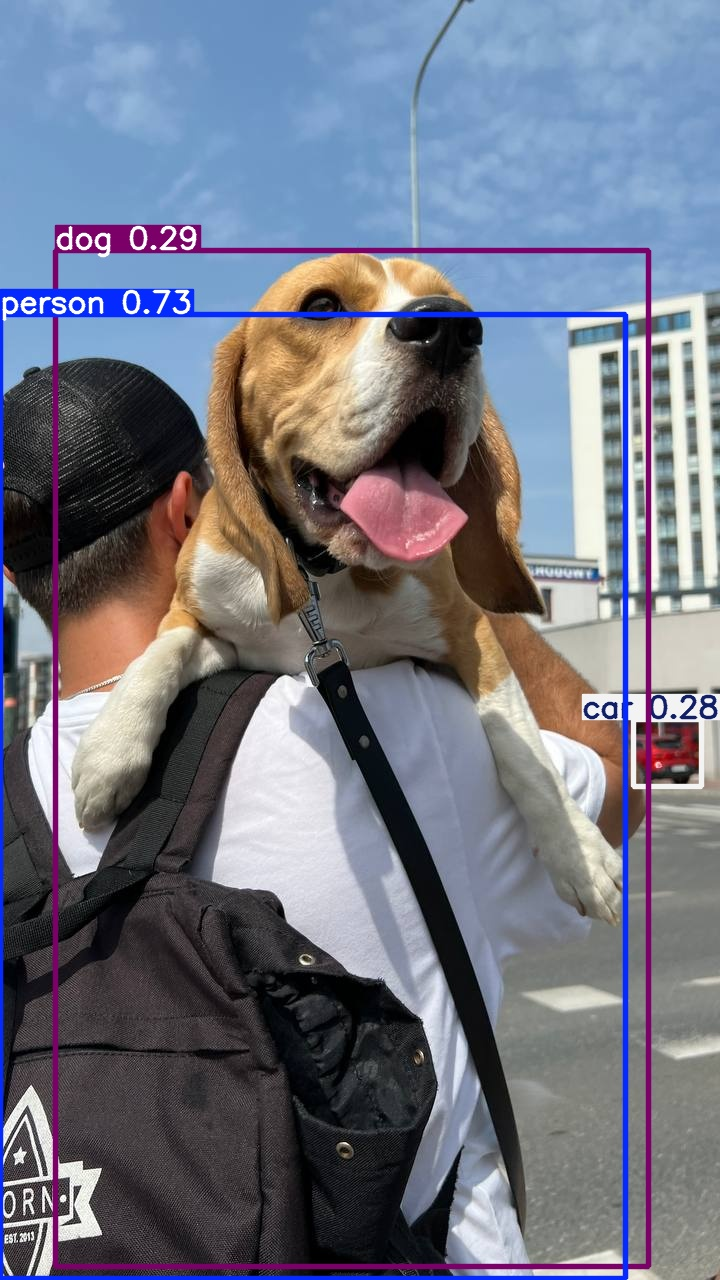

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

100%|██████████| 6.25M/6.25M [00:00<00:00, 96.1MB/s]


100%|██████████| 104k/104k [00:00<00:00, 33.3MB/s]


image 1/1 /content/{HOME}/datasets/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 102.6ms
Speed: 11.2ms preprocess, 102.6ms inference, 1197.4ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a [supported format](https://roboflow.com/formats), the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v8` dataset format. (Formerly, we used to use `Yolov5`, as the gif shows)

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




🟢 Tip: The examples below work even if you use our non-custom model. However, you won't be able to deploy it to Roboflow. To do that, create a custom dataset as described below or fork (copy) one into your workspace from Universe.

In [5]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="ySwoSkeaOIW6GHOK0U9v")
project = rf.workspace("elif-5vzyt").project("cyst-hgyad")
version = project.version(1)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.8 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cyst-1 in yolov8:: 100%|██████████| 1178/1178 [00:00<00:00, 7277.69it/s]


## Custom Training

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 254MB/s]
New https://pypi.org/project/ultralytics/8.3.23 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/cyst-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes

In [7]:
!ls /{HOME}/runs/detect/train/

args.yaml					    PR_curve.png	 train_batch1.jpg
confusion_matrix_normalized.png			    R_curve.png		 train_batch2.jpg
confusion_matrix.png				    results.csv		 val_batch0_labels.jpg
events.out.tfevents.1730135175.adbd876a4e38.1473.0  results.png		 val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	 val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1040.jpg  val_batch1_pred.jpg
labels.jpg					    train_batch1041.jpg  weights
P_curve.png					    train_batch1042.jpg


/content


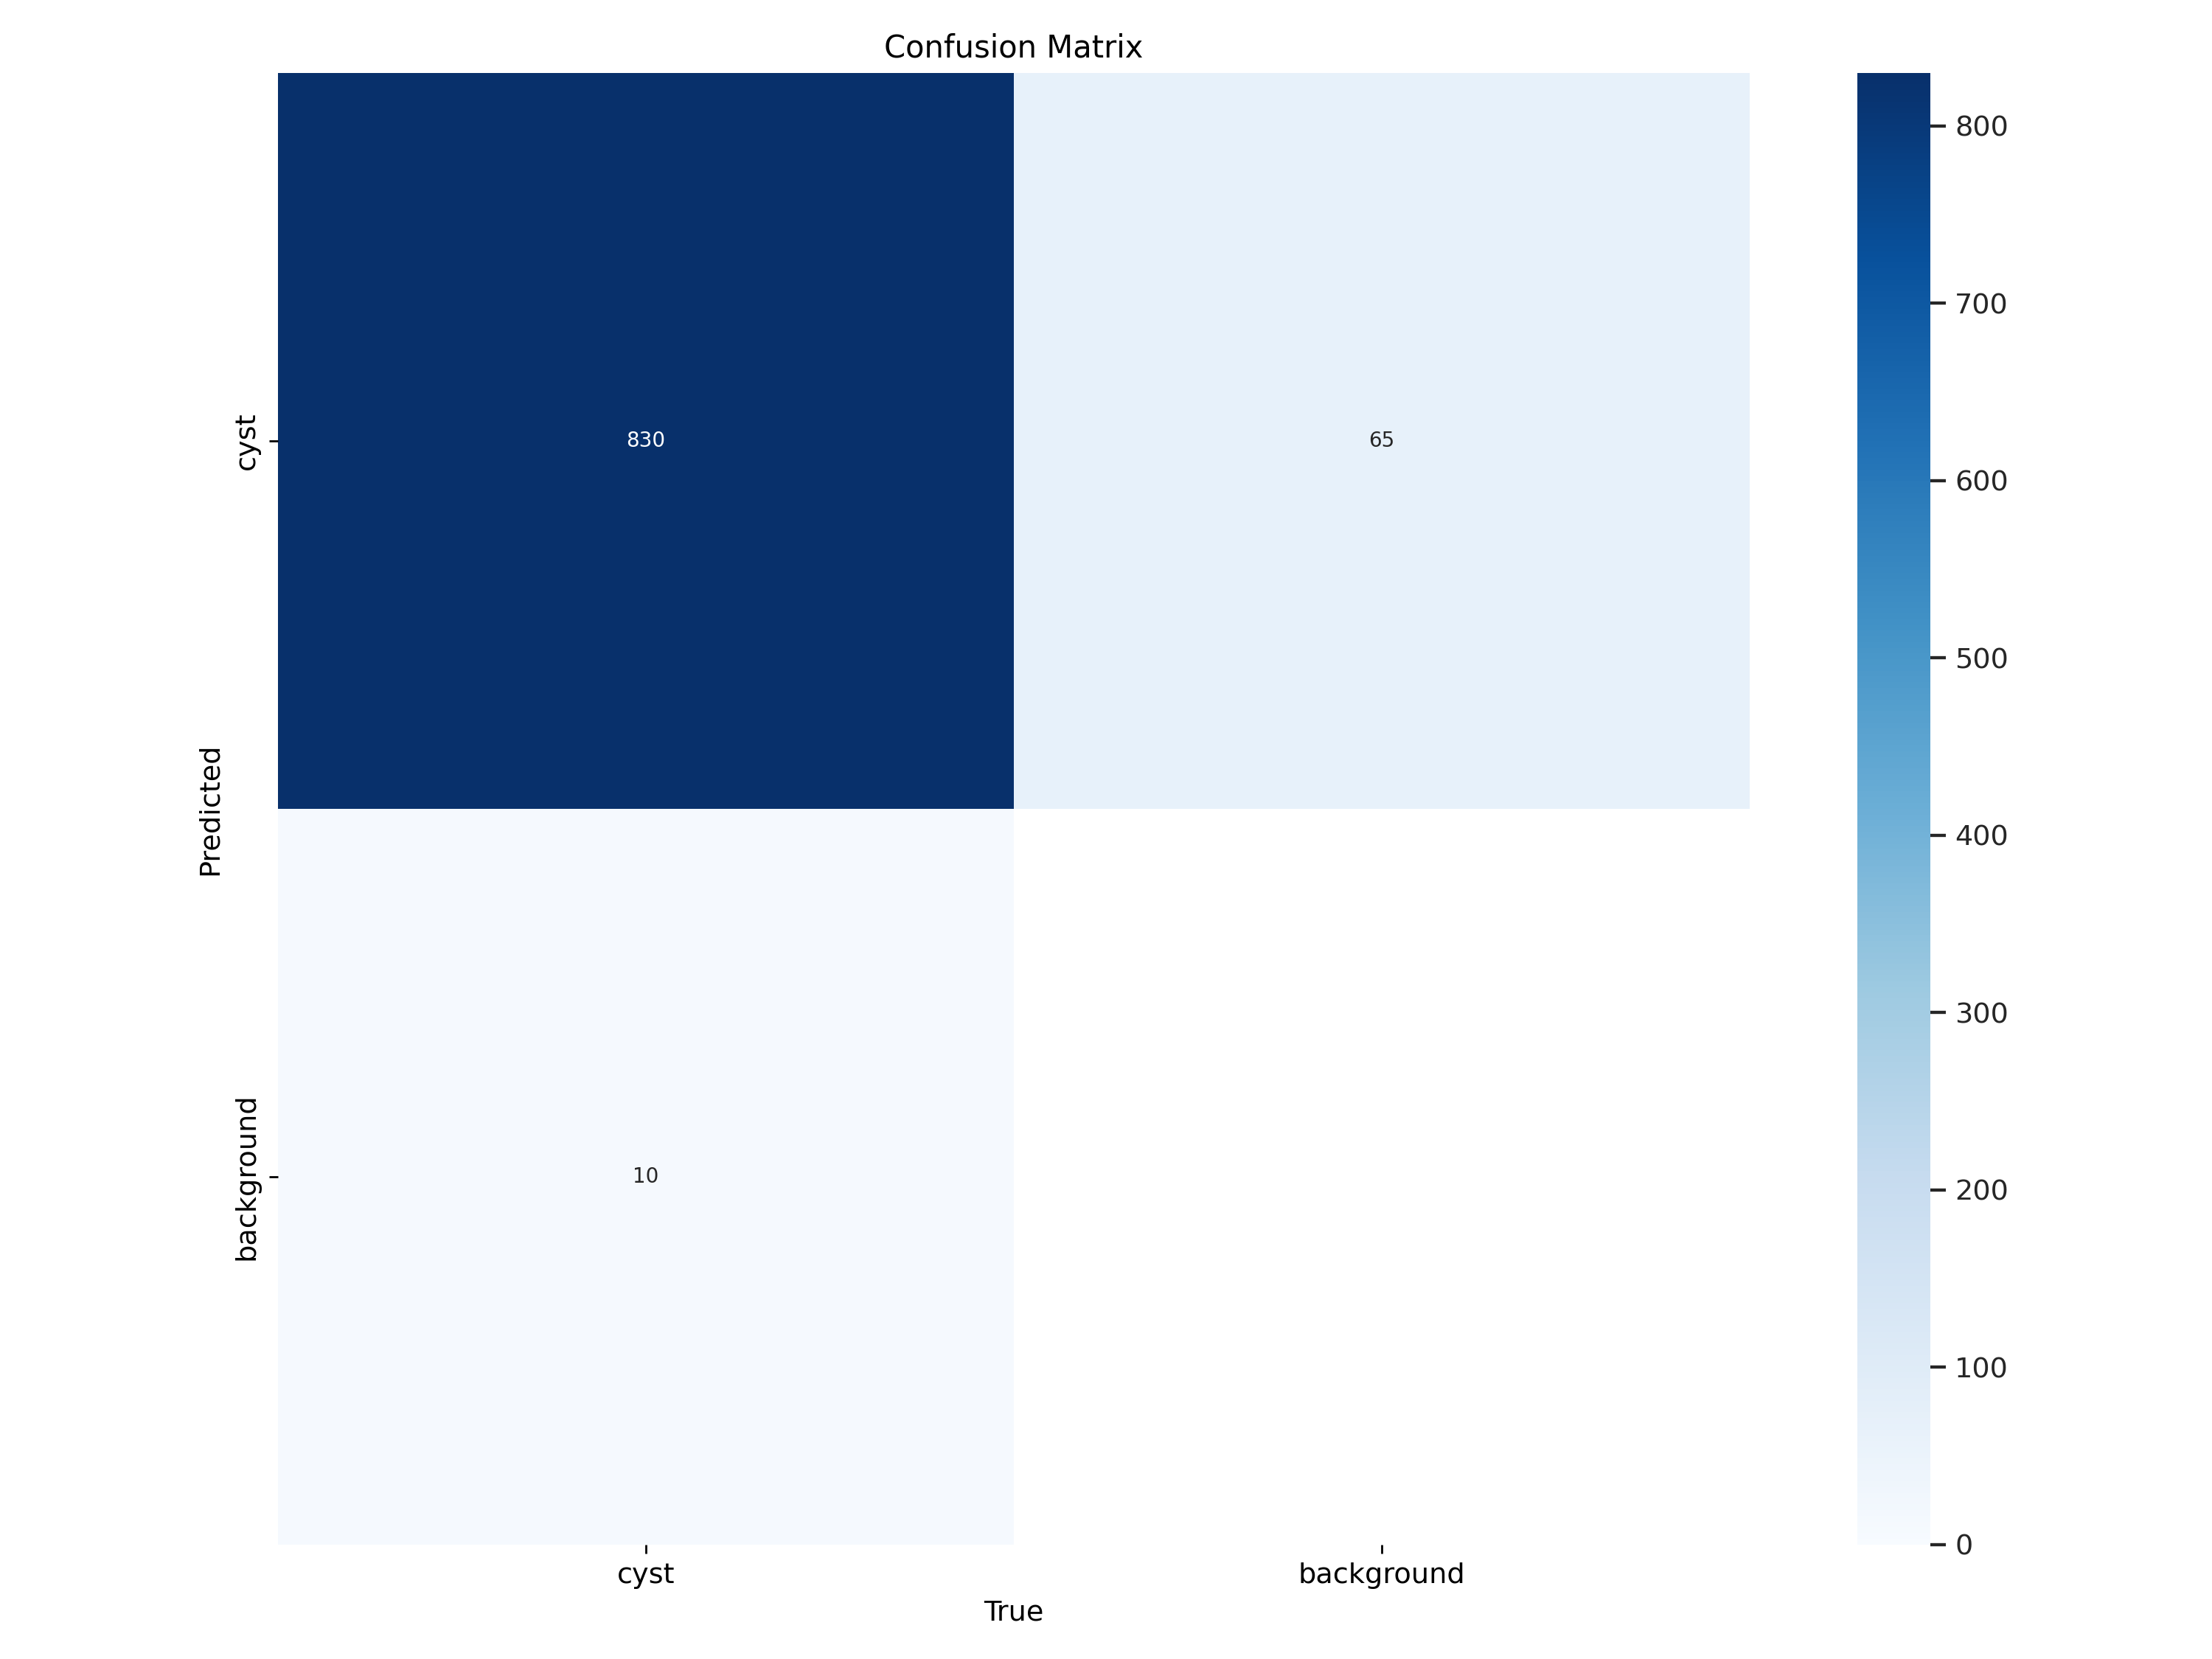

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)


/content


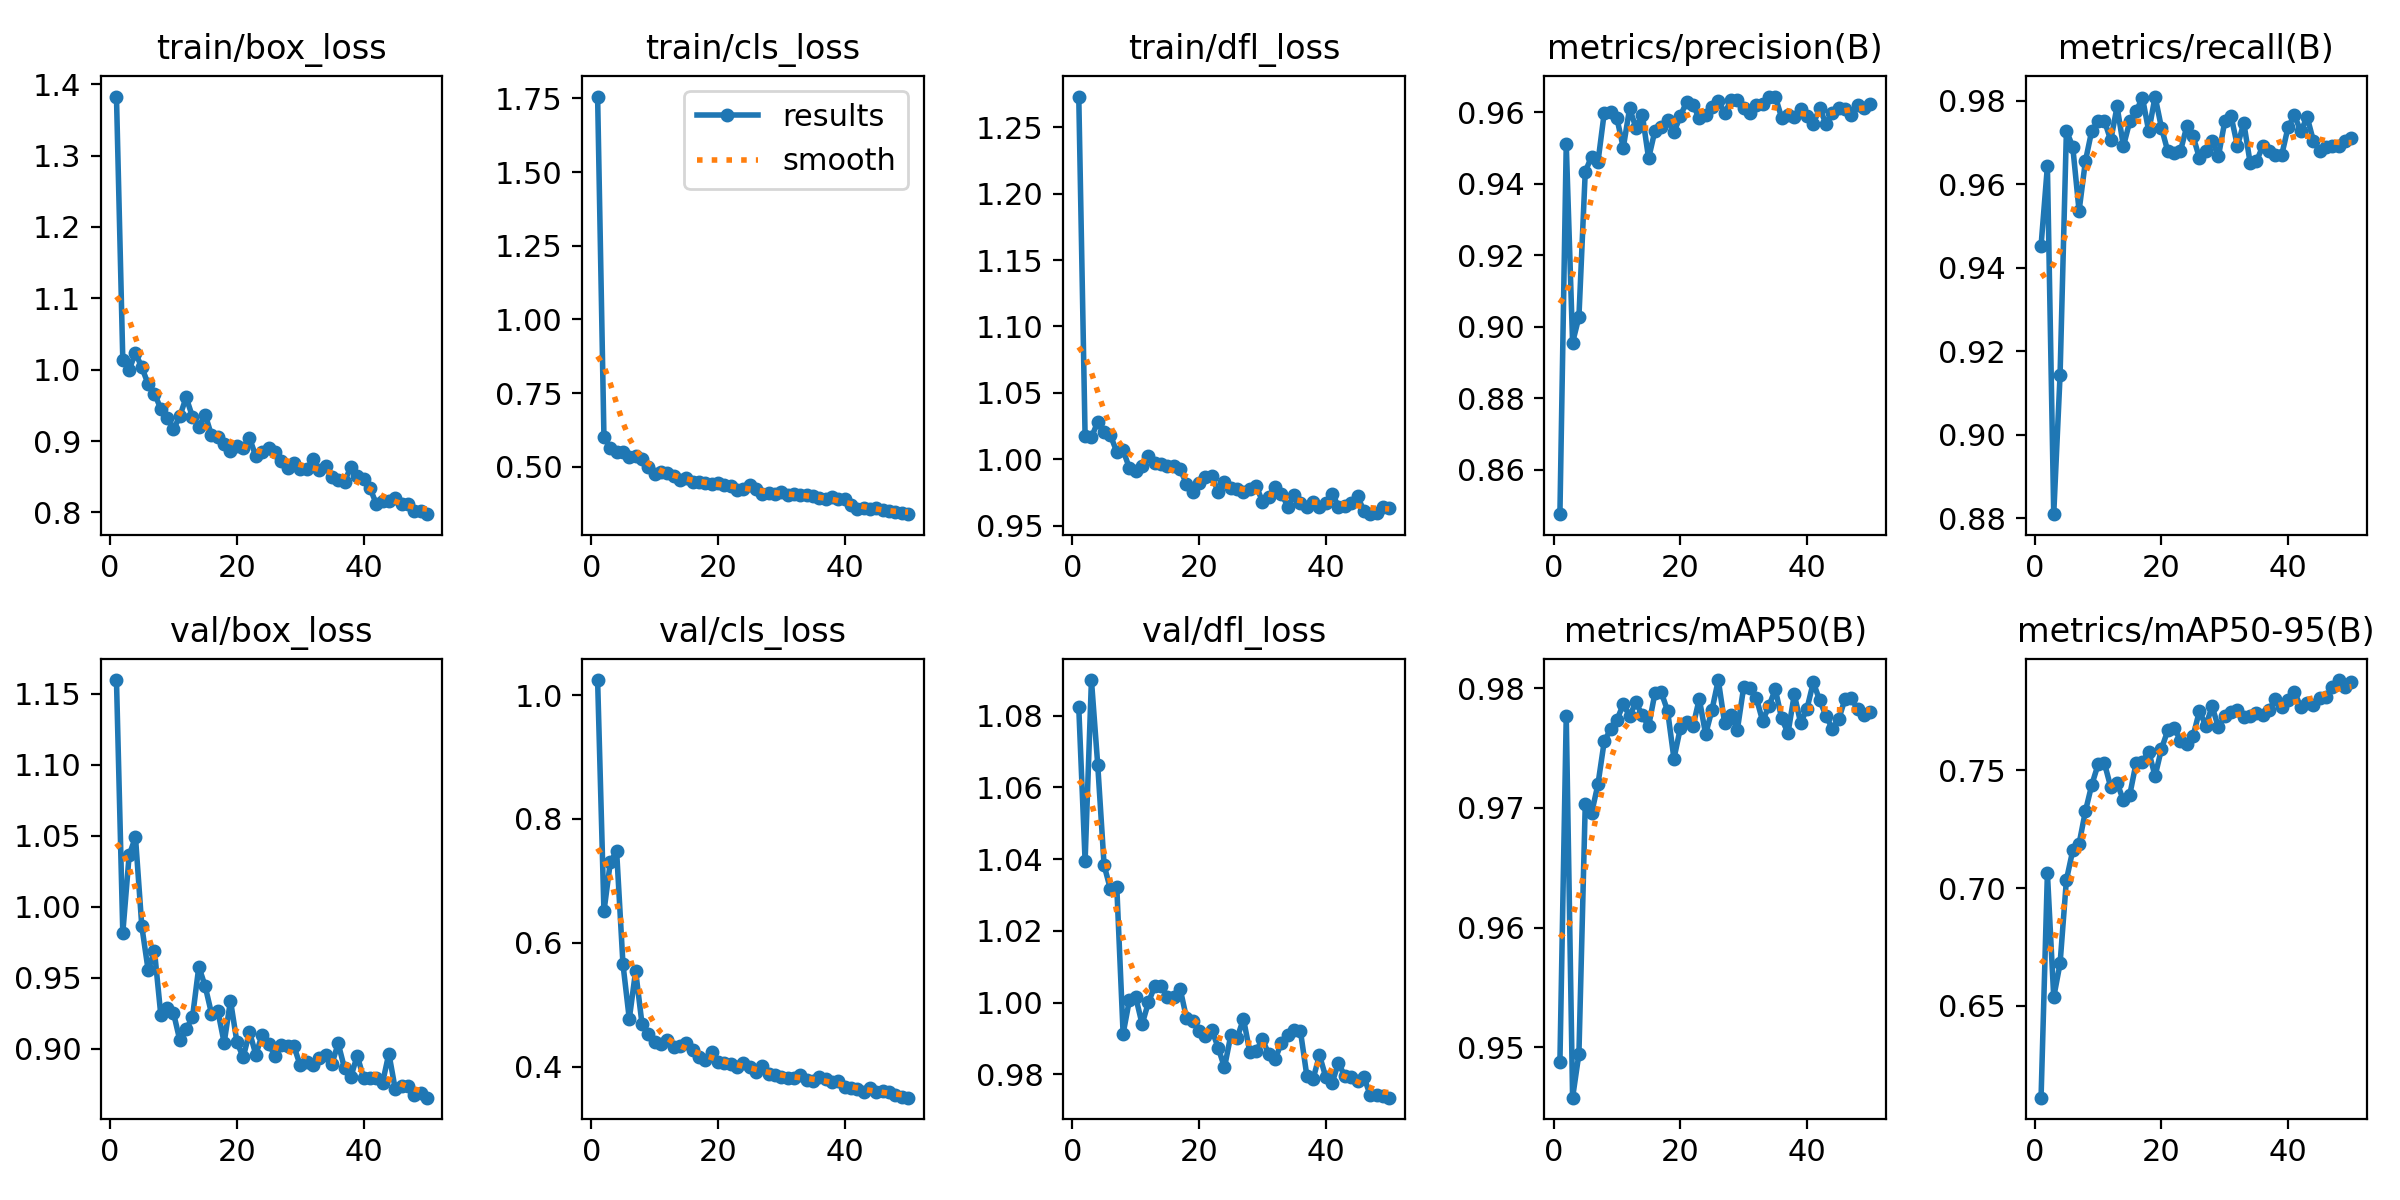

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


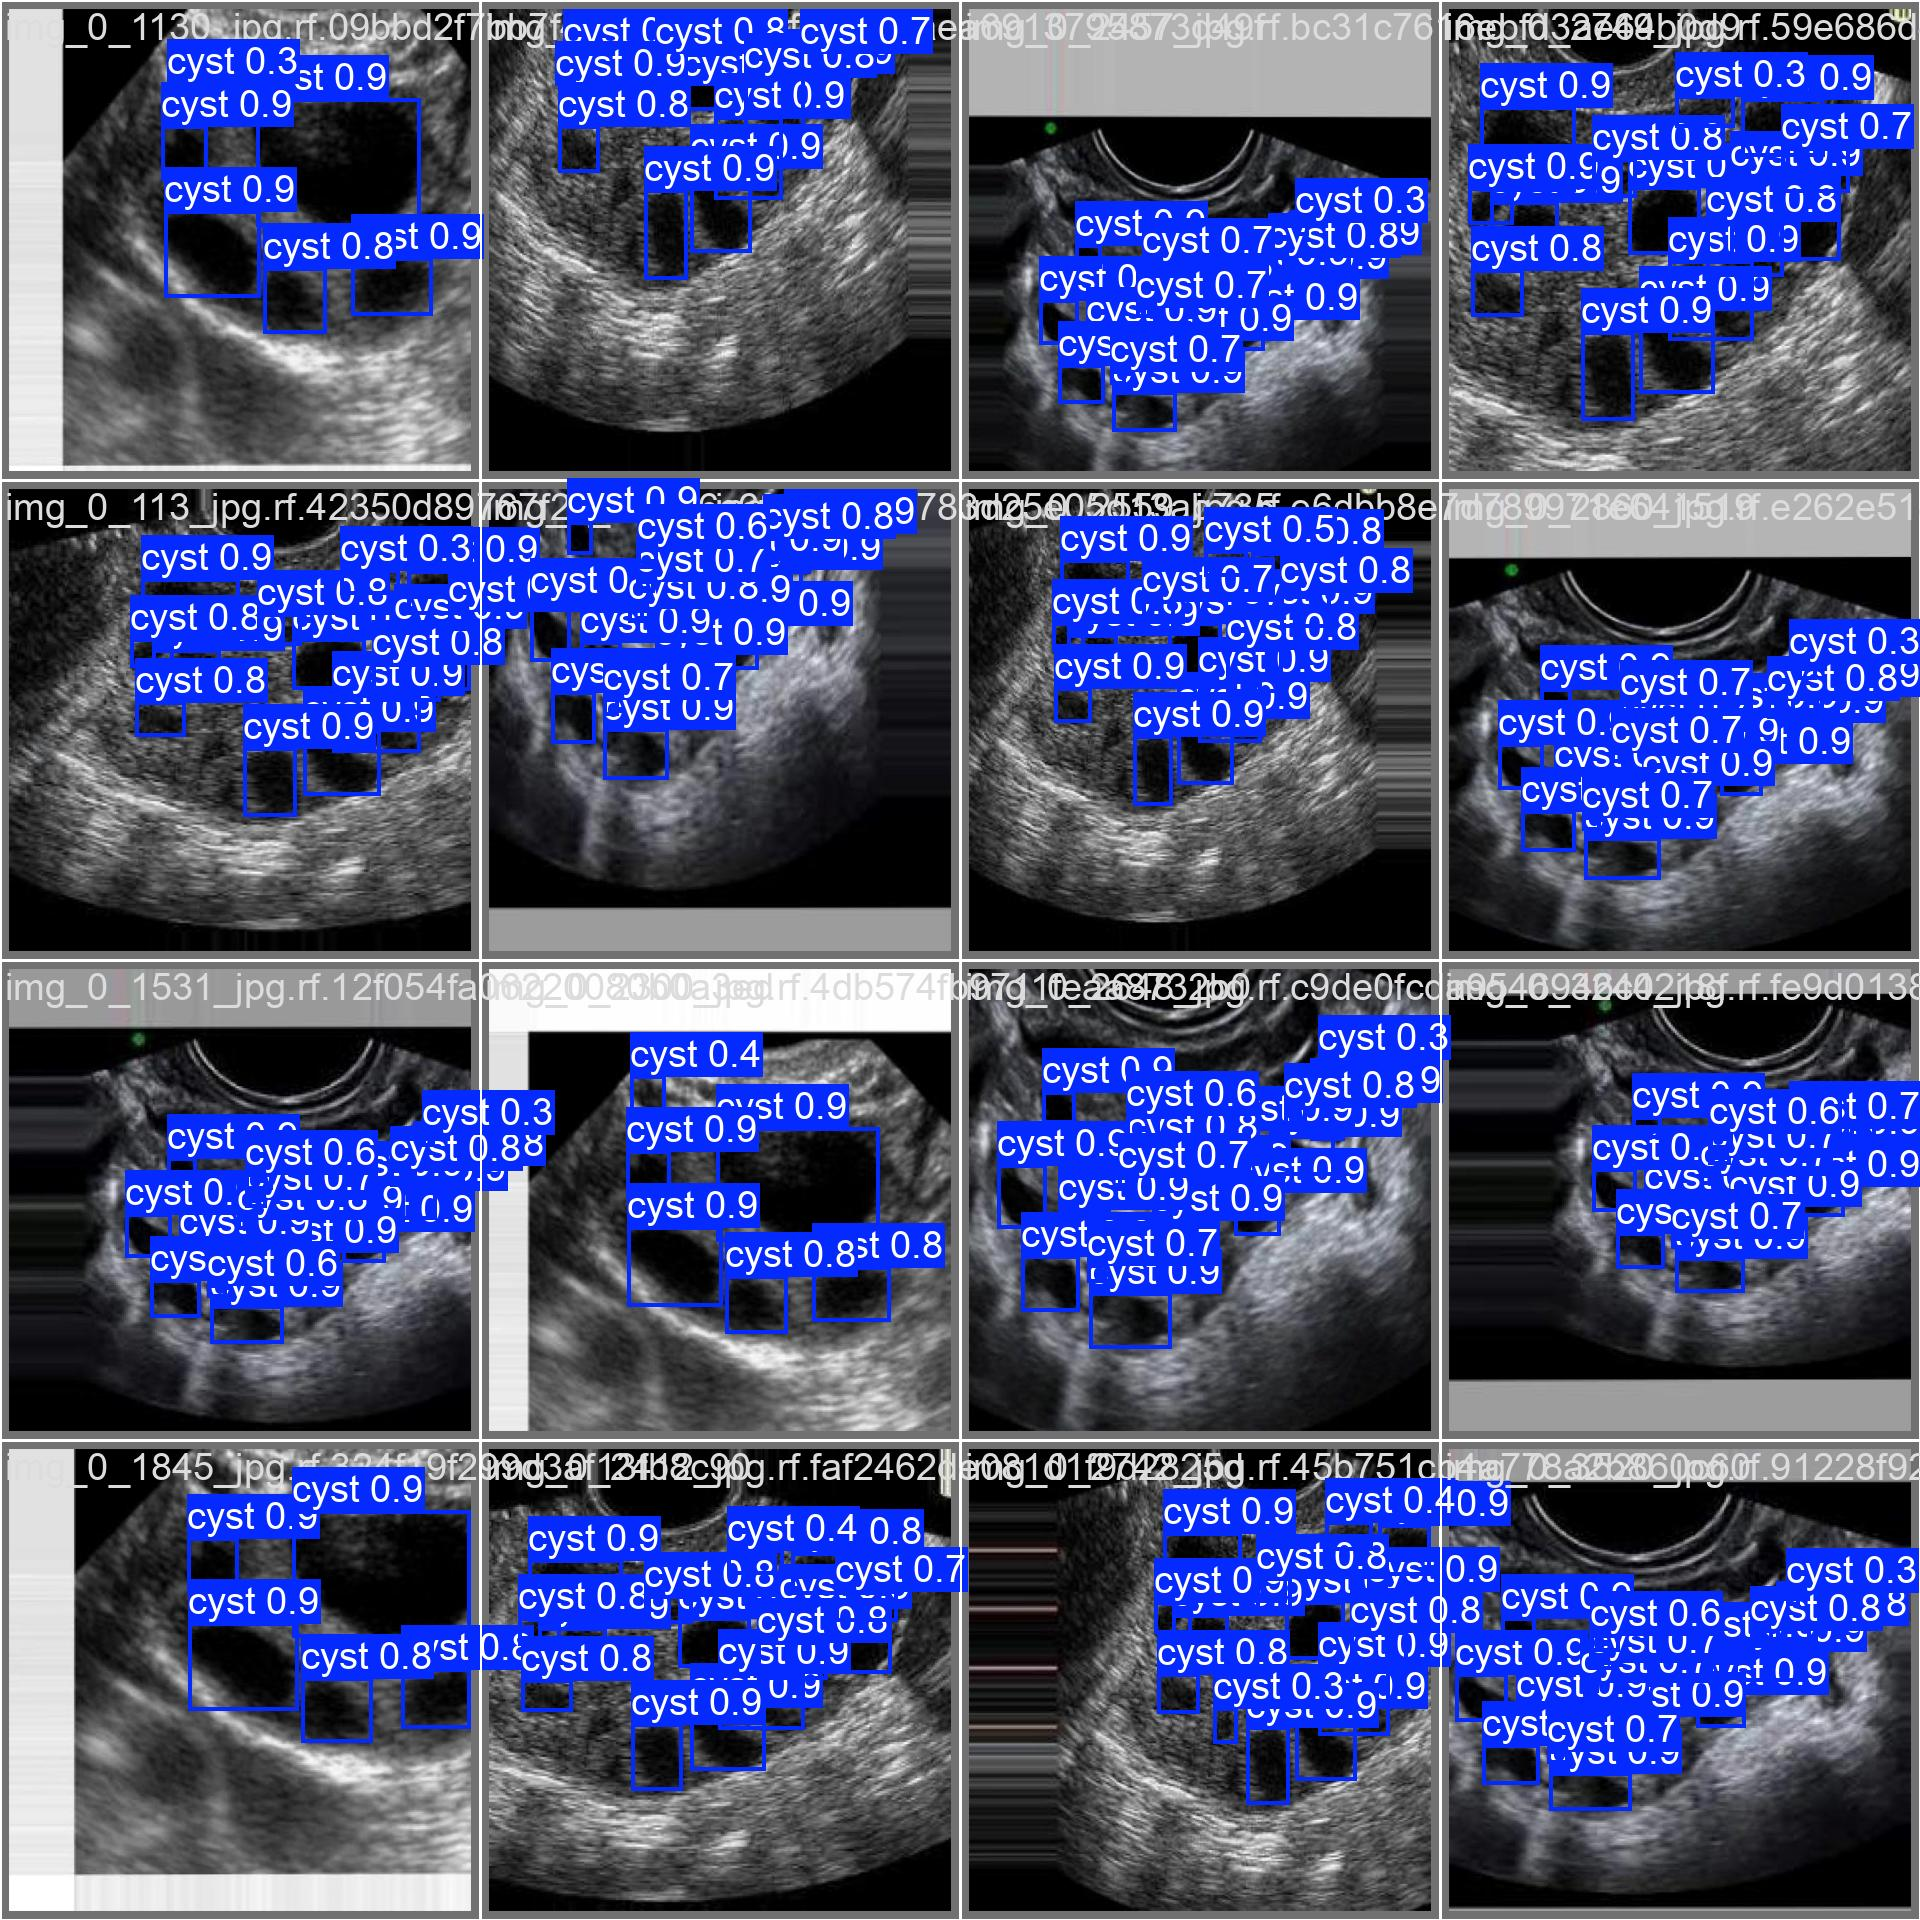

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/cyst-1/valid/labels.cache... 64 images, 0 backgrounds, 0 corrupt: 100% 64/64 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/cyst-1/valid/images/img_0_2742_jpg.rf.45b751cb4a778a2b860c605f077ec3a5.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:05<00:00,  1.47s/it]
                   all         64        840      0.962      0.969      0.978      0.788
Speed: 17.5ms preprocess, 14.6ms inference, 0.0ms loss, 13.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/110 /content/datasets/cyst-1/test/images/img_0_1023_jpg.rf.1b508d7e1d96ea93cdb81c54082fed41.jpg: 800x800 16 cysts, 22.9ms
image 2/110 /content/datasets/cyst-1/test/images/img_0_1079_jpg.rf.843994259ff0aae6cd2ecbf6719ea39e.jpg: 800x800 6 cysts, 22.9ms
image 3/110 /content/datasets/cyst-1/test/images/img_0_1226_jpg.rf.60f490ad1f70ec78a87081eab4b80f54.jpg: 800x800 13 cysts, 22.8ms
image 4/110 /content/datasets/cyst-1/test/images/img_0_1472_jpg.rf.ab3e75797ef5765a2e1abad85c8fafe7.jpg: 800x800 17 cysts, 22.8ms
image 5/110 /content/datasets/cyst-1/test/images/img_0_1556_jpg.rf.a74e5a13dfd5d7e93d3ab16905e8dd38.jpg: 800x800 18 cysts, 22.8ms
image 6/110 /content/datasets/cyst-1/test/images/img_0_1663_jpg.rf.8cd7192ddbb52665c75d335d0f702064.jpg: 800x800 6 cysts, 19.9ms
image 7/110 /content/datasets/cyst-1/test

**NOTE:** Let's take a look at few results.

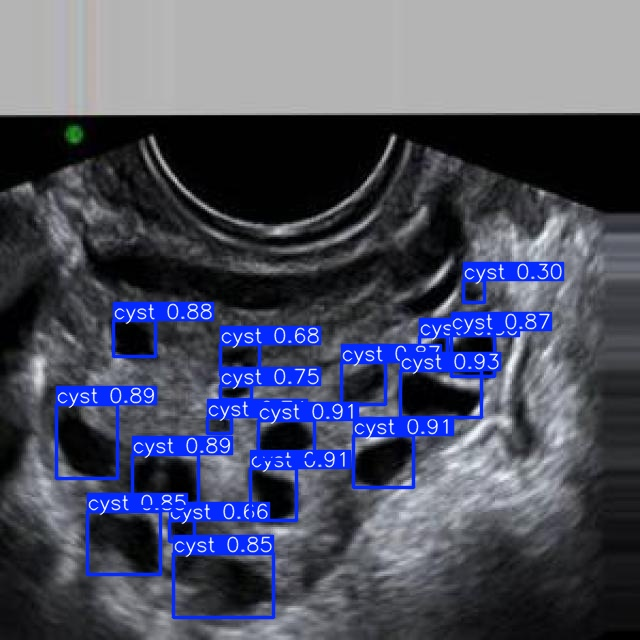

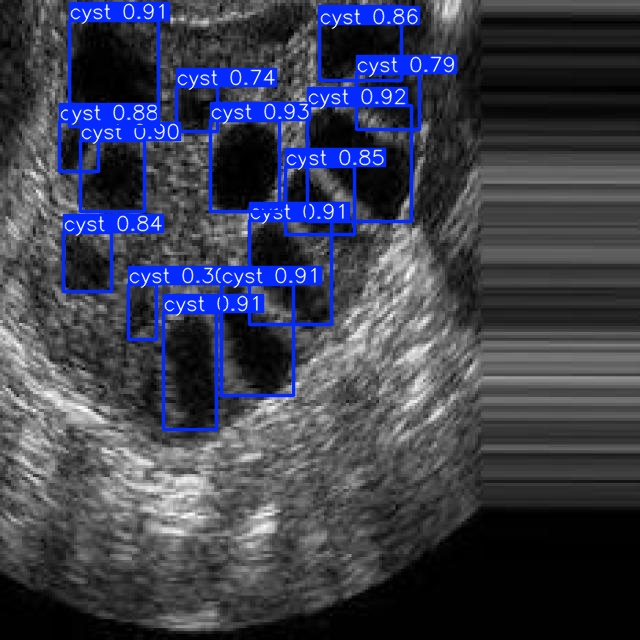

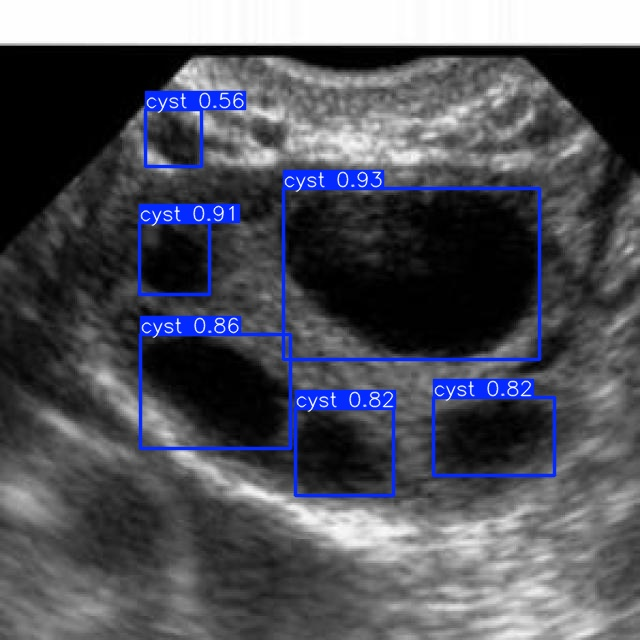

In [21]:
import os
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = 'runs/detect/'

# Check if the base path exists
if not os.path.exists(base_path):
    print(f"The base path '{base_path}' does not exist.")
else:
    # List all directories that start with 'predict' in the base path
    subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
                  if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

    # Check if any 'predict' folders were found
    if not subfolders:
        print("No 'predict' folders found in the specified base path.")
    else:
        # Find the latest folder by modification time
        latest_folder = max(subfolders, key=os.path.getmtime)

        # Get paths of the first three JPG images in the latest folder
        image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

        # Check if any images were found
        if not image_paths:
            print(f"No JPG images found in the latest folder '{latest_folder}'.")
        else:
            # Display each image
            for image_path in image_paths:
                display(Image(filename=image_path, width=600))
                print("\n")


In [25]:
import os
import cv2
import pandas as pd
import glob
from IPython.display import Image, display

# Function to calculate the area of a contour
def calculate_area(contour):
    return cv2.contourArea(contour)

# Define the base path where the folders are located
base_path = 'runs/detect/'

# Check if the base path exists
if not os.path.exists(base_path):
    print(f"The base path '{base_path}' does not exist.")
else:
    # List all directories that start with 'predict' in the base path
    subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
                  if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

    if not subfolders:
        print("No 'predict' folders found in the specified base path.")
    else:
        # Find the latest folder by modification time
        latest_folder = max(subfolders, key=os.path.getmtime)

        # Get paths of all JPG images in the latest folder
        image_paths = glob.glob(f'{latest_folder}/*.jpg')

        # Prepare a list to store results
        results = []

        # Process each image
        for image_path in image_paths:
            # Load the image
            image = cv2.imread(image_path)

            # Convert the image to grayscale
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Threshold the image to create a binary mask (you may want to adjust the thresholding method)
            _, binary_mask = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

            # Find contours in the binary mask
            contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Filter contours based on area size if necessary
            # e.g., remove small contours that are not considered follicles
            min_area = 50  # Adjust based on your needs
            follicles = [c for c in contours if calculate_area(c) >= min_area]

            total_follicles = len(follicles)
            areas = [calculate_area(contour) for contour in follicles]
            total_area = sum(areas)

            # Save results
            results.append({
                'Image': os.path.basename(image_path),
                'Total_Follicles': total_follicles,
                'Total_Area': total_area
            })

        # Create a DataFrame and save to CSV
        df = pd.DataFrame(results)
        output_csv = os.path.join(latest_folder, 'follicle_analysis_results.csv')
        df.to_csv(output_csv, index=False)
        print(f"Results saved to {output_csv}")


Results saved to runs/detect/predict/follicle_analysis_results.csv


In [26]:
import os
import cv2
import pandas as pd
import glob
from IPython.display import Image, display

# Function to calculate the area of a contour
def calculate_area(contour):
    return cv2.contourArea(contour)

# Define the base path where the folders are located
base_path = 'runs/detect/'

# Check if the base path exists
if not os.path.exists(base_path):
    print(f"The base path '{base_path}' does not exist.")
else:
    # List all directories that start with 'predict' in the base path
    subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
                  if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

    if not subfolders:
        print("No 'predict' folders found in the specified base path.")
    else:
        # Find the latest folder by modification time
        latest_folder = max(subfolders, key=os.path.getmtime)

        # Get paths of all JPG images in the latest folder
        image_paths = glob.glob(f'{latest_folder}/*.jpg')

        # Prepare a list to store results
        results = []

        # Process each image
        for image_path in image_paths:
            # Load the image
            image = cv2.imread(image_path)

            # Convert the image to grayscale
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Threshold the image to create a binary mask
            _, binary_mask = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

            # Find contours in the binary mask
            contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Filter contours based on area size if necessary
            min_area = 50  # Adjust based on your needs
            follicles = [c for c in contours if calculate_area(c) >= min_area]

            # Store individual follicle areas
            follicle_areas = [calculate_area(contour) for contour in follicles]
            total_follicles = len(follicles)

            # Save results: image name, total follicles, and individual areas
            results.append({
                'Image': os.path.basename(image_path),
                'Total_Follicles': total_follicles,
                'Follicle_Areas': follicle_areas  # This will be a list of areas
            })

        # Create a DataFrame to save results
        result_data = []

        for result in results:
            # Expand results to have each area in a separate row
            for area in result['Follicle_Areas']:
                result_data.append({
                    'Image': result['Image'],
                    'Total_Follicles': result['Total_Follicles'],
                    'Follicle_Area': area
                })

        df = pd.DataFrame(result_data)
        output_csv = os.path.join(latest_folder, 'follicle_analysis_results.csv')
        df.to_csv(output_csv, index=False)
        print(f"Results saved to {output_csv}")


Results saved to runs/detect/predict/follicle_analysis_results.csv
